<a href="https://colab.research.google.com/github/rojan-herald/concepts_and_technologies_of_ai/blob/main/Worksheet6PartII.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 5CS037 Worksheet 6
Implementation of Softmax Regression from Scratch

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler


In [2]:

def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)


In [3]:

def loss_softmax(y_true, y_pred):
    return -np.sum(y_true * np.log(y_pred + 1e-10))


In [4]:

def cost_softmax(X, y, W, b):
    n = X.shape[0]
    z = np.dot(X, W) + b
    y_pred = softmax(z)
    return -np.sum(y * np.log(y_pred + 1e-10)) / n


In [5]:

def compute_gradient_softmax(X, y, W, b):
    n = X.shape[0]
    z = np.dot(X, W) + b
    y_pred = softmax(z)
    grad_W = np.dot(X.T, (y_pred - y)) / n
    grad_b = np.sum(y_pred - y, axis=0) / n
    return grad_W, grad_b


In [6]:

def gradient_descent_softmax(X, y, W, b, alpha, n_iter, show_cost=False):
    cost_history = []
    for i in range(n_iter):
        grad_W, grad_b = compute_gradient_softmax(X, y, W, b)
        W -= alpha * grad_W
        b -= alpha * grad_b
        cost = cost_softmax(X, y, W, b)
        cost_history.append(cost)
        if show_cost and (i % 100 == 0 or i == n_iter - 1):
            print(f"Iteration {i}: Cost = {cost:.6f}")
    return W, b, cost_history


In [7]:

def predict_softmax(X, W, b):
    z = np.dot(X, W) + b
    y_pred = softmax(z)
    return np.argmax(y_pred, axis=1)


In [8]:

from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

def evaluate_classification(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average="weighted", zero_division=0)
    recall = recall_score(y_true, y_pred, average="weighted", zero_division=0)
    f1 = f1_score(y_true, y_pred, average="weighted", zero_division=0)
    return cm, precision, recall, f1


In [9]:

# Load Iris Dataset
iris = load_iris()
X = iris.data
y = iris.target

encoder = OneHotEncoder(sparse_output=False)
y_onehot = encoder.fit_transform(y.reshape(-1, 1))

X_train, X_test, y_train, y_test = train_test_split(
    X, y_onehot, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [10]:

num_classes = y_train.shape[1]
num_features = X_train_scaled.shape[1]

W = np.zeros((num_features, num_classes))
b = np.zeros(num_classes)

alpha = 0.1
n_iter = 1000

W, b, cost_history = gradient_descent_softmax(
    X_train_scaled, y_train, W, b, alpha, n_iter, show_cost=True
)


Iteration 0: Cost = 1.006823
Iteration 100: Cost = 0.319428
Iteration 200: Cost = 0.251376
Iteration 300: Cost = 0.211741
Iteration 400: Cost = 0.185004
Iteration 500: Cost = 0.165744
Iteration 600: Cost = 0.151226
Iteration 700: Cost = 0.139898
Iteration 800: Cost = 0.130812
Iteration 900: Cost = 0.123360
Iteration 999: Cost = 0.117192


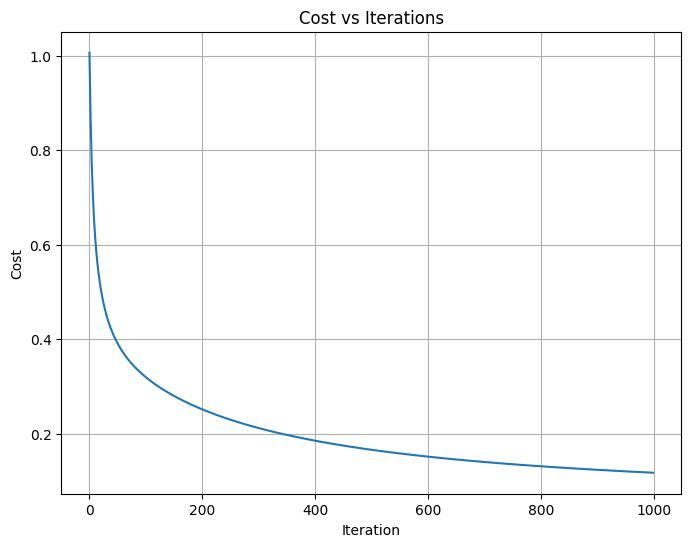

In [11]:

plt.figure(figsize=(8,6))
plt.plot(cost_history)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Cost vs Iterations")
plt.grid()
plt.show()


In [12]:

y_train_pred = predict_softmax(X_train_scaled, W, b)
y_test_pred = predict_softmax(X_test_scaled, W, b)

train_cost = cost_softmax(X_train_scaled, y_train, W, b)
test_cost = cost_softmax(X_test_scaled, y_test, W, b)

print("Train Cost:", train_cost)
print("Test Cost:", test_cost)


Train Cost: 0.11719197796193107
Test Cost: 0.15746616161033547


In [13]:

y_test_true = np.argmax(y_test, axis=1)
test_accuracy = np.mean(y_test_pred == y_test_true) * 100
print("Test Accuracy:", test_accuracy)

cm, precision, recall, f1 = evaluate_classification(y_test_true, y_test_pred)
print("Confusion Matrix:\n", cm)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Test Accuracy: 93.33333333333333
Confusion Matrix:
 [[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]
Precision: 0.9333333333333333
Recall: 0.9333333333333333
F1 Score: 0.9333333333333333
